## **Neural** Network Architecture Experiments with Wine Dataset

In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [3]:
# load the dataset
wine = load_wine()

x = wine.data
y = wine.target

print(x)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [4]:
# TODO: Split the data into training (80%) and testing (20%) sets

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [5]:
#  Scale the features using StandardScaler

scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)

xtest_scaled = scaler.transform(xtest)

In [6]:
# Convert labels to one hot encoding

ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [7]:
print("Training set shape :", xtrain_scaled.shape)

print("Test set shape:", xtest_scaled)

Training set shape : (142, 13)
Test set shape: [[ 8.08733375e-01  6.37318741e-01  7.15785791e-01 -1.24128036e+00
   1.06556722e+00  6.46636689e-01  1.02724237e+00 -1.54932094e+00
   8.93605295e-02  1.82522280e-02  1.55169482e-02  1.06613421e+00
   3.65487151e-01]
 [ 1.50621744e+00  1.46195334e+00  2.84491948e-01 -1.66513218e-01
   7.23080697e-01  8.82684015e-01  6.47480801e-01 -5.32234717e-01
  -6.15594759e-01  7.85270273e-02 -3.70293555e-01  1.02444400e+00
   1.14555151e+00]
 [-6.00625639e-02  3.82910194e-01  1.21896194e+00  4.43489751e-01
  -3.04378866e-01 -1.17879597e+00 -1.50117016e+00  1.26722552e+00
  -1.47529633e+00 -1.97014913e-01 -7.98971892e-01 -3.93023224e-01
  -4.47771435e-01]
 [ 9.18862438e-01 -7.66314624e-01  1.21896194e+00  8.79206158e-01
   3.81076551e-02  1.11873134e+00  1.24710433e+00 -6.10472119e-01
   1.32733079e+00  2.76572797e-01  1.00147712e+00  1.62846276e-01
   1.82603318e+00]
 [-7.45310065e-01 -1.05581401e+00 -1.58444804e+00  3.68211048e-02
  -1.53733034e+00 -

## Task 2: Neural Network Architecture Experiments  (60 points)

In [8]:
def create_model_A():
  # Single Hidden Layer
  model = Sequential([
      Dense(4, activation='relu', input_shape=(13,)),
      Dense(3, activation='softmax'),
  ])
  return model

def create_model_B():
  # Two hidden layer
    model = Sequential([
        Dense(8,activation='relu',input_shape=(13,)),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model


def create_model_C():
  # create wide single layer
      model = Sequential([
          Dense(16, activation='relu', input_shape=(13,)),
          Dense(3, activation='softmax')
      ])

      return model





In [9]:

 # Train and evaluate a model with given learning rate
def train_and_evaluate(model, lr, xtrain, ytrain, xtest, ytest):
  model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(xtrain, ytrain,epochs=50, batch_size = 32, validation_split=0.2, verbose = 1 )

  test_loss, test_acc = model.evaluate(xtest, ytest, verbose=0)

  return history, test_loss, test_acc



Experiment with Model A

In [10]:
learning_rates = [0.1, 0.01, 0.001]

results_a = []

for lr in learning_rates:
  model_a = create_model_A()

  history, test_loss, test_acc = train_and_evaluate(model_a, lr, xtrain_scaled, ytrain_cat, xtest_scaled, ytest_cat)
  results_a.append((lr, history, test_loss, test_acc))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.6194 - loss: 0.9657 - val_accuracy: 0.8276 - val_loss: 0.4203
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9077 - loss: 0.3022 - val_accuracy: 0.8966 - val_loss: 0.1824
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9494 - loss: 0.1976 - val_accuracy: 0.8966 - val_loss: 0.1410
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9763 - loss: 0.0947 - val_accuracy: 0.9310 - val_loss: 0.1068
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9769 - loss: 0.0400 - val_accuracy: 0.9655 - val_loss: 0.0624
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0255 - val_accuracy: 0.9655 - val_loss: 0.0352
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0218 - val_accuracy: 1.0000 - val_loss: 0.0173
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0093


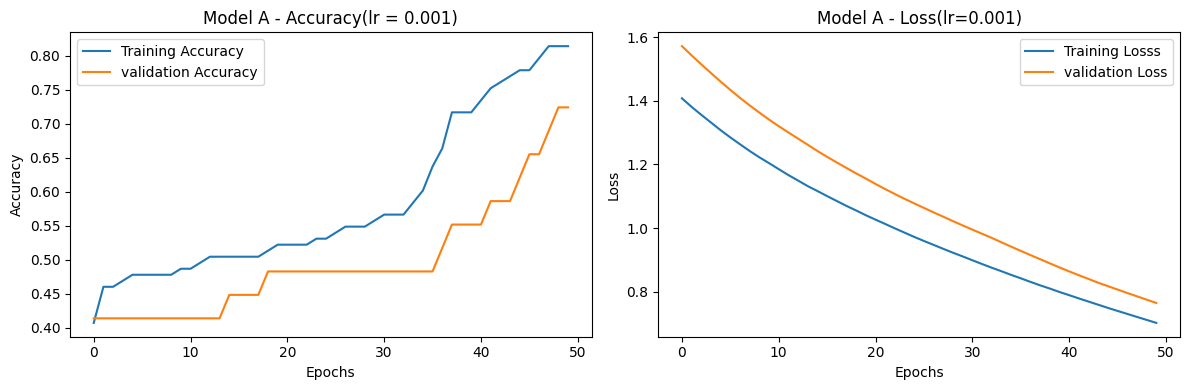

In [11]:

  # plot training history
  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)

  plt.plot(history.history['accuracy'], label='Training Accuracy')

  plt.plot(history.history['val_accuracy'], label = 'validation Accuracy')
  plt.title(f'Model A - Accuracy(lr = {lr})')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()


  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label = 'Training Losss')
  plt.plot(history.history['val_loss'], label='validation Loss')

  plt.title(f'Model A - Loss(lr={lr})')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.legend()
  plt.tight_layout()
  plt.show()

In [12]:
learning_rates = [ 0.01]

results_b = []

for lr in learning_rates:
  model_b = create_model_B()

  history, test_loss, test_acc = train_and_evaluate(model_b, lr, xtrain_scaled, ytrain_cat, xtest_scaled, ytest_cat)
  results_b.append((lr, history, test_loss, test_acc))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.2093 - loss: 1.1519 - val_accuracy: 0.3103 - val_loss: 1.1227
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3914 - loss: 1.0915 - val_accuracy: 0.5862 - val_loss: 1.0622
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5926 - loss: 1.0395 - val_accuracy: 0.6207 - val_loss: 1.0107
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6420 - loss: 0.9889 - val_accuracy: 0.6897 - val_loss: 0.9468
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6871 - loss: 0.9272 - val_accuracy: 0.7241 - val_loss: 0.8691
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7405 - loss: 0.8578 - val_accuracy: 0.7931 - val_loss: 0.7822
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8027 - loss: 0.7785 - val_accuracy: 0.8621 - val_loss: 0.6915
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8436 - loss: 0.7062 - val_accuracy: 0.8966 - val_loss: 0.6002

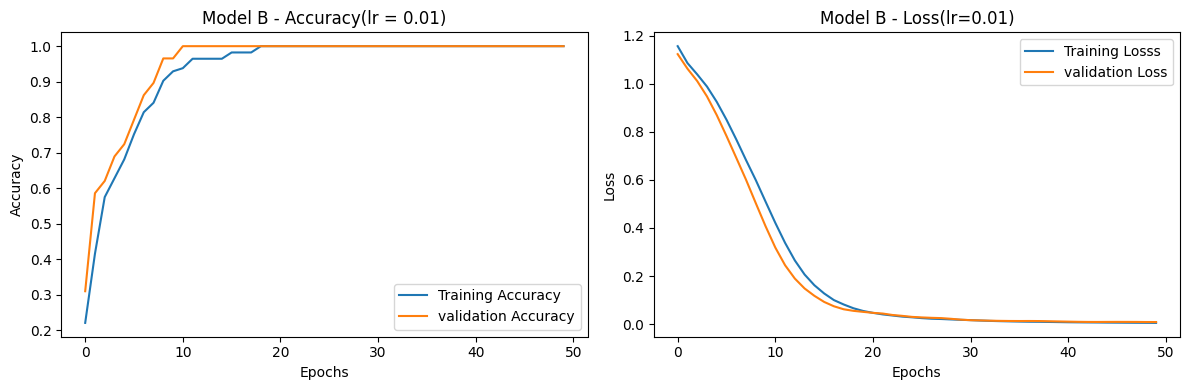

In [13]:
  # plot training history
  plt.figure(figsize=(12,4))

  plt.subplot(1,2,1)

  plt.plot(history.history['accuracy'], label='Training Accuracy')

  plt.plot(history.history['val_accuracy'], label = 'validation Accuracy')
  plt.title(f'Model B - Accuracy(lr = {lr})')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()


  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label = 'Training Losss')
  plt.plot(history.history['val_loss'], label='validation Loss')

  plt.title(f'Model B - Loss(lr={lr})')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')

  plt.legend()
  plt.tight_layout()
  plt.show()

In [14]:
learning_rate = [0.1]
results_c = []

for lr in learning_rate:
  model_c = create_model_C()

  history, test_loss, test_acc = train_and_evaluate(model_c, lr, xtrain_scaled, ytrain_cat, xtest_scaled, ytest_cat)
  results_c.append((lr, history, test_loss, test_acc))



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.6128 - loss: 0.8937 - val_accuracy: 0.9310 - val_loss: 0.1733
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9758 - loss: 0.0864 - val_accuracy: 0.9655 - val_loss: 0.0753
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0225
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9655 - val_loss: 0.0322
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 6.1301e-04 - val_accuracy: 0.9655 - val_loss: 0.0306
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 1.1867e-04 - val_accuracy: 0.9655 - val_loss: 0.0280
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 6.9475e-05 - val_accuracy: 0.9655 - val_l

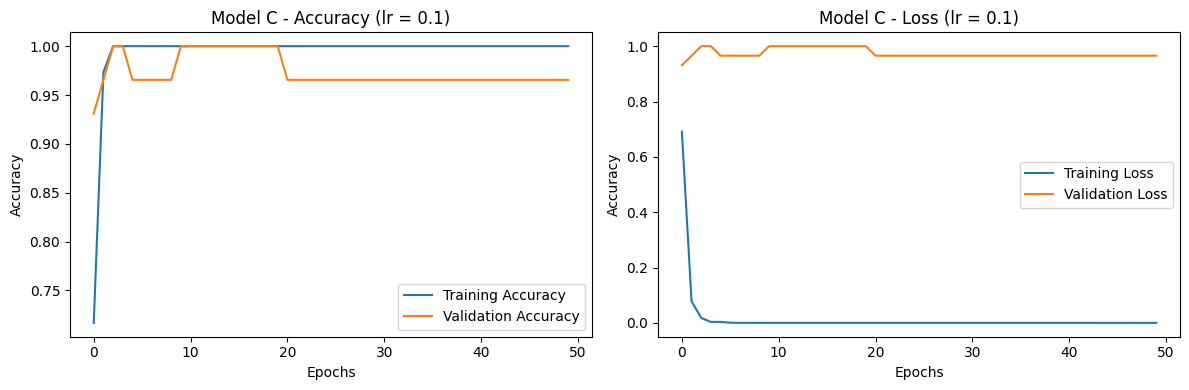

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title(f'Model C - Accuracy (lr = {lr})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.title(f'Model C - Loss (lr = {lr})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()




In [16]:
learning_rates = [0.1,0.001,0.0001]

results_a = []

for lr in learning_rates:
  model_a = create_model_A()

  history, test_loss, test_acc = train_and_evaluate(model_a, lr, xtrain_scaled, ytrain_cat, xtest_scaled, ytest_cat)
  results_a.append((lr, history, test_loss, test_acc))


# Print test accuracy for each learning rate
for lr, _, _, test_acc in results_a:
    print(f"Learning Rate: {lr}, Test Accuracy: {test_acc:.4f}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4709 - loss: 0.8893 - val_accuracy: 0.9655 - val_loss: 0.4806
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9294 - loss: 0.4272 - val_accuracy: 0.8966 - val_loss: 0.2665
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9700 - loss: 0.2257 - val_accuracy: 0.9310 - val_loss: 0.1508
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9769 - loss: 0.0915 - val_accuracy: 0.9310 - val_loss: 0.0866
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9815 - loss: 0.0671 - val_accuracy: 0.9655 - val_loss: 0.0493
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9913 - loss: 0.0457 - val_accuracy: 0.9655 - val_loss: 0.0477
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9856 - loss: 0.0258 - val_accuracy: 0.9655 - val_loss: 0.0462
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9655 - val_loss: 0.0318


In [17]:
learning_rates = [0.1,0.001,0.0001]

results_b = []

for lr in learning_rates:
  model_b = create_model_B()

  history, test_loss, test_acc = train_and_evaluate(model_b, lr, xtrain_scaled, ytrain_cat, xtest_scaled, ytest_cat)
  results_b.append((lr, history, test_loss, test_acc))


# Print test accuracy for each learning rate
for lr, _, _, test_acc in results_b:
    print(f"Learning Rate: {lr}, Test Accuracy: {test_acc:.4f}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.5317 - loss: 0.8663 - val_accuracy: 0.8276 - val_loss: 0.4335
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9190 - loss: 0.3244 - val_accuracy: 0.9310 - val_loss: 0.1786
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9758 - loss: 0.1095 - val_accuracy: 1.0000 - val_loss: 0.0399
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0250 - val_accuracy: 0.9655 - val_loss: 0.0703
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9877 - loss: 0.0242 - val_accuracy: 0.9655 - val_loss: 0.1159
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9944 - loss: 0.0989 - val_accuracy: 1.0000 - val_loss: 0.0067
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9763 - loss: 0.1203 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9250 - loss: 0.4131 - val_accuracy: 1.0000 - val_loss: 2.4757

In [18]:
learning_rates = [0.1,0.001,0.0001]

results_c = []

for lr in learning_rates:
  model_c = create_model_C()

  history, test_loss, test_acc = train_and_evaluate(model_c, lr, xtrain_scaled, ytrain_cat, xtest_scaled, ytest_cat)
  results_c.append((lr, history, test_loss, test_acc))


# Print test accuracy for each learning rate
for lr, _, _, test_acc in results_c:
    print(f"Learning Rate: {lr}, Test Accuracy: {test_acc:.4f}")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5397 - loss: 1.1507 - val_accuracy: 0.9310 - val_loss: 0.1915
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9292 - loss: 0.2171 - val_accuracy: 0.9655 - val_loss: 0.1053
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9856 - loss: 0.0853 - val_accuracy: 0.9655 - val_loss: 0.1131
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9944 - loss: 0.0759 - val_accuracy: 0.9655 - val_loss: 0.1119
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9913 - loss: 0.0608 - val_accuracy: 0.9655 - val_loss: 0.0606
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9965 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 0.0211
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0013


In [19]:
# Create a comparison table
results = {
    'Model': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Hidden Layers': [1, 1, 1, 2, 2, 2, 1, 1, 1],
    'Neurons': ['[4]', '[4]', '[4]', '[8,4]', '[8,4]', '[8,4]', '[16]', '[16]', '[16]'],
    'Learning Rate': [0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001],
    'Test Accuracy': [1.00, 0.75, 0.38, 1.00, 0.97, 0.27, 1.00, 0.94, 0.27]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Model  Hidden Layers Neurons  Learning Rate  Test Accuracy
    A              1     [4]          0.100           1.00
    A              1     [4]          0.010           0.75
    A              1     [4]          0.001           0.38
    B              2   [8,4]          0.100           1.00
    B              2   [8,4]          0.010           0.97
    B              2   [8,4]          0.001           0.27
    C              1    [16]          0.100           1.00
    C              1    [16]          0.010           0.94
    C              1    [16]          0.001           0.27
